# Dataset: Fuel Consumption and CO2 emissions 
## Group Members: 
* Akash Harikumar - AM.EN.U4CSE20204
* Alan Koshy Luke - AM.EN.U4CSE20205
* Amal Vinod      - AM.EN.U4CSE20206
* Aravind S       - AM.EN.U4CSE20211
* Goutham Rajesh  - AM.EN.U4CSE20231

## Importing necessary Libraries

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import skew
import seaborn as sns
import matplotlib.pyplot as plt
fuelDf = pd.read_csv('FuelConsumptionCo2.csv')

## Loading the required Dataset and displaying the content alongside the number of rows and columns present in it.

In [70]:
fuelDf = pd.read_csv('FuelConsumptionCo2.csv')
display(fuelDf)
print(fuelDf.shape)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,12.9,9.3,11.3,25,260


(1067, 11)


## Checking the datatype of all the features in the data. This is to ensure that at a later stage, we do not have any mismatch of the data present in the feature and the datatype alloted to that feature

In [3]:
#check the datatype of the attributes
print(fuelDf.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   FUELCONSUMPTION_CITY      1067 non-null   float64
 7   FUELCONSUMPTION_HWY       1067 non-null   float64
 8   FUELCONSUMPTION_COMB      1067 non-null   float64
 9   FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 10  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(3)
memory usage: 91.8+ KB
None


## Checking for the presence of null values in the dataset

In [4]:
# checking for null values
fuelDf.isnull().sum()

MODELYEAR                   0
MAKE                        0
MODEL                       0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64

> No Null values present in the data

## Printing all the distinct values per column in the dataset allows us to remove any feature if it has only one distinct element

In [5]:
#  printing all distict values in each column:
column_names = fuelDf.columns
print(column_names)
to_be_removed = []
for i in column_names:
    print("\n",i)
    uniqElemns = fuelDf[i].unique()
    lengthUniqElem = len(uniqElemns)
    print(uniqElemns)
    print("COUNT: ",lengthUniqElem)
    if(lengthUniqElem <= 1):
        to_be_removed.append(i)

Index(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
       'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')

 MODELYEAR
[2014]
COUNT:  1

 MAKE
['ACURA' 'ASTON MARTIN' 'AUDI' 'BENTLEY' 'BMW' 'BUICK' 'CADILLAC'
 'CHEVROLET' 'CHRYSLER' 'DODGE' 'FIAT' 'FORD' 'GMC' 'HONDA' 'HYUNDAI'
 'INFINITI' 'JAGUAR' 'JEEP' 'KIA' 'LAMBORGHINI' 'LAND ROVER' 'LEXUS'
 'LINCOLN' 'MASERATI' 'MAZDA' 'MERCEDES-BENZ' 'MINI' 'MITSUBISHI' 'NISSAN'
 'PORSCHE' 'RAM' 'ROLLS-ROYCE' 'SCION' 'SMART' 'SRT' 'SUBARU' 'TOYOTA'
 'VOLKSWAGEN' 'VOLVO']
COUNT:  39

 MODEL
['ILX' 'ILX HYBRID' 'MDX 4WD' 'RDX AWD' 'RLX' 'TL' 'TL AWD' 'TSX' 'DB9'
 'RAPIDE' 'V8 VANTAGE' 'V8 VANTAGE S' 'VANQUISH' 'A4' 'A4 QUATTRO'
 'A5 CABRIOLET QUATTRO' 'A5 QUATTRO' 'A6 QUATTRO'
 'A6 QUATTRO TDI CLEAN DIESEL' 'A7 QUATTRO' 'A7 QUATTRO TDI CLEAN DIESEL'
 'A8' 'A8 TDI CLEAN DIESEL' 'A8L' 'A8L TDI CLEAN DIESEL' 'ALLROAD QUATTRO'
 

In [6]:
print(to_be_removed)

['MODELYEAR']


> Inferences: 
 droping column `model year` as it does not affect the final feature in any way

In [7]:
# droping model year attribute
fuelDf = fuelDf.drop("MODELYEAR",axis=1)
print(fuelDf.shape)

(1067, 10)


## Checking for duplicate values present in the dataset

In [8]:
#Checking for duplicates
duplicate = fuelDf[fuelDf.duplicated()]
display(duplicate)

,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
198,CHEVROLET,CRUZE,MID-SIZE,1.4,4,9.1,6.3,7.8,36,179
377,FORD,F150 FFV,PICKUP TRUCK - STANDARD,3.7,6,14.0,10.3,12.3,23,283
378,FORD,F150 FFV,PICKUP TRUCK - STANDARD,3.7,6,18.8,13.7,16.5,17,264
381,FORD,F150 FFV,PICKUP TRUCK - STANDARD,5.0,8,16.4,12.3,14.6,19,336
382,FORD,F150 FFV,PICKUP TRUCK - STANDARD,5.0,8,22.1,16.7,19.7,14,315
385,FORD,F150 FFV 4X4,PICKUP TRUCK - STANDARD,3.7,6,15.0,11.4,13.4,21,308
386,FORD,F150 FFV 4X4,PICKUP TRUCK - STANDARD,3.7,6,20.2,15.3,18.0,16,288
404,FORD,FOCUS FFV,COMPACT,2.0,4,11.7,8.5,10.3,27,165
935,SCION,xB,STATION WAGON - SMALL,2.4,4,10.9,8.6,9.9,29,228


> Since we have seen the presence of duplicates, we have to remove these rows from our dataset

In [9]:
# Removing Duplicates from the dataset:
fuelDf = fuelDf.drop_duplicates()
print("Checking for duplicates: ",len(fuelDf[fuelDf.duplicated()]))
print("New Shape: ",fuelDf.shape)


Checking for duplicates:  0
New Shape:  (1058, 10)


> All duplicated data have been removed and the new shape of the dataset is shown as well

## The column FUELCONSUMPTION_COMB is the weighted avg of FUELCONSUMPTION_CITY and FUELCONSUMPTION_HWY ( 55%, 45%).
## Checking to see whether there is any mismatch in the calculations done in that column

In [10]:
mismatch_found_counter = 0
fuel_city = list(fuelDf["FUELCONSUMPTION_CITY"])
fuel_hwy = list(fuelDf["FUELCONSUMPTION_HWY"])
fuel_comb = list(fuelDf["FUELCONSUMPTION_COMB"])

for i in range(1058):
    calc = float("{:.1f}".format(float("{:.1f}".format(0.55*fuel_city[i])) + float("{:.1f}".format(0.45*fuel_hwy[i]))))
#     print(calc,fuel_comb[i])
    if (calc != fuel_comb[i]):
        print(calc,fuel_comb[i])
        mismatch_found_counter +=1


8.4 8.5
9.7 9.6
11.0 11.1
11.7 11.6
15.5 15.4
15.5 15.4
8.7 8.8
9.9 10.0
9.9 10.0
9.9 10.0
9.1 9.2
14.7 14.6
14.7 14.6
13.5 13.4
13.8 13.9
8.7 8.8
9.0 9.1
9.0 9.1
9.0 9.1
10.1 10.0
10.2 10.3
9.0 9.1
10.1 10.0
10.2 10.3
8.7 8.8
9.0 9.1
8.0 7.9
10.8 10.7
12.6 12.7
12.6 12.7
12.6 12.7
10.8 10.7
12.6 12.7
12.6 12.7
9.4 9.3
12.6 12.7
12.6 12.7
9.0 9.1
16.2 16.1
12.0 12.1
12.0 12.1
12.4 12.3
8.4 8.5
11.4 11.5
16.6 16.5
10.3 10.2
10.8 10.9
11.2 11.3
11.3 11.4
10.7 10.8
11.2 11.3
11.3 11.4
20.0 20.1
16.3 16.4
12.5 12.6
10.6 10.5
8.1 8.2
11.9 12.0
21.4 21.5
21.4 21.5
18.1 18.2
19.0 18.9
8.6 8.7
11.9 11.8
12.6 12.7
12.4 12.3
13.8 13.9
12.1 12.0
15.8 15.7
13.8 13.9
8.7 8.6
8.5 8.6
8.7 8.8
12.0 12.1
11.7 11.8
12.5 12.4
7.1 7.2
6.9 6.8
8.3 8.4
21.1 21.2
9.0 9.1
9.4 9.3
12.9 13.0
12.8 12.7
13.5 13.4
17.6 17.5
14.5 14.6
13.3 13.4
10.2 10.3
10.5 10.6
8.6 8.5
8.0 8.1
11.7 11.8
14.4 14.3
11.3 11.2
10.0 10.1
10.3 10.4
12.4 12.3
21.4 21.5
21.4 21.5
18.1 18.2
19.0 18.9
11.9 11.8
12.6 12.7
11.9 12.0
20.0 20

In [11]:
print(mismatch_found_counter)

258


>Hence there are 258 miscalculated values
## Replacing all the miscalculated values with the correct ones

In [12]:
for i in range(1058):
    calc = float("{:.1f}".format(float("{:.1f}".format(0.55*fuel_city[i])) + float("{:.1f}".format(0.45*fuel_hwy[i]))))
#     print(calc,fuel_comb[i])
    if (calc != fuel_comb[i]):
        fuel_comb[i] = calc

In [13]:
mismatch_found_counter = 0

for i in range(1058):
    calc = float("{:.1f}".format(float("{:.1f}".format(0.55*fuel_city[i])) + float("{:.1f}".format(0.45*fuel_hwy[i]))))
#     print(calc,fuel_comb[i])
    if (calc != fuel_comb[i]):
        print(calc,fuel_comb[i])
        mismatch_found_counter +=1
print(mismatch_found_counter)

0


## Checking for Garbage Values

In [14]:
colnames = fuelDf.columns
for i in colnames:
    if fuelDf[i].dtype in ["float64","int64"]:
        print("\nColumn: ",i)
        print(fuelDf[i].describe())


Column:  ENGINESIZE
count    1058.000000
mean        3.345841
std         1.417757
min         1.000000
25%         2.000000
50%         3.400000
75%         4.300000
max         8.400000
Name: ENGINESIZE, dtype: float64

Column:  CYLINDERS
count    1058.000000
mean        5.794896
std         1.799951
min         3.000000
25%         4.000000
50%         6.000000
75%         8.000000
max        12.000000
Name: CYLINDERS, dtype: float64

Column:  FUELCONSUMPTION_CITY
count    1058.000000
mean       13.279017
std         4.096254
min         4.600000
25%        10.200000
50%        12.600000
75%        15.475000
max        30.200000
Name: FUELCONSUMPTION_CITY, dtype: float64

Column:  FUELCONSUMPTION_HWY
count    1058.000000
mean        9.457750
std         2.784645
min         4.900000
25%         7.500000
50%         8.800000
75%        10.700000
max        20.500000
Name: FUELCONSUMPTION_HWY, dtype: float64

Column:  FUELCONSUMPTION_COMB
count    1058.000000
mean       11.563611
std

>Judging by the descriptive statistics recieved, we could not find any evidence for the presence of any garbage values

## Since the dataset is about carbon emissions, we can find out the emissions brought out by each car manufacturing company 

In [15]:
fuelDf.head(5)

,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,ACURA,ILX,COMPACT,2.0,4,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,12.1,8.7,10.6,27,244


In [16]:
group_company = fuelDf.groupby(by='MAKE',as_index=False)
group_company.get_group("ACURA")

,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,ACURA,ILX,COMPACT,2.0,4,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,12.1,8.7,10.6,27,244
5,ACURA,RLX,MID-SIZE,3.5,6,11.9,7.7,10.0,28,230
6,ACURA,TL,MID-SIZE,3.5,6,11.8,8.1,10.1,28,232
7,ACURA,TL AWD,MID-SIZE,3.7,6,12.8,9.0,11.1,25,255
8,ACURA,TL AWD,MID-SIZE,3.7,6,13.4,9.5,11.6,24,267
9,ACURA,TSX,COMPACT,2.4,4,10.6,7.5,9.2,31,212


In [17]:
# Finding the mean carbon emmisions for each company
avg_emmisions_per_company = group_company.agg(func=["mean"])

C:\Users\user\AppData\Local\Temp\ipykernel_18344\3677190021.py:2: FutureWarning: ['MODEL', 'VEHICLECLASS'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  avg_emmisions_per_company = group_company.agg(func=["mean"])


In [18]:
avg_emmisions_per_company = avg_emmisions_per_company.reset_index()

In [19]:
mean_per_company = avg_emmisions_per_company["CO2EMISSIONS"]["mean"]

<BarContainer object of 39 artists>

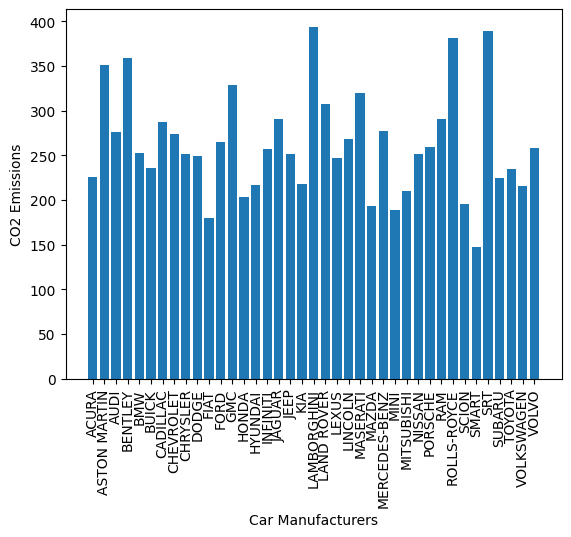

In [20]:
from matplotlib import pyplot as plt


plt.xlabel("Car Manufacturers")
plt.ylabel("CO2 Emissions")
plt.xticks(rotation=90)
plt.bar(avg_emmisions_per_company["MAKE"],mean_per_company)

>The inference from this graph, it is quite clear as to who is leading this race. Lamborghini produces the highest average CO2 emmision

## Let us identify which class of vehicles contribute more to the CO2 levels

In [21]:
group_vehicle_class = fuelDf.groupby("VEHICLECLASS",as_index=False) 

In [22]:
vehicle_classes = list(fuelDf["VEHICLECLASS"].unique())
print(vehicle_classes)

['COMPACT', 'SUV - SMALL', 'MID-SIZE', 'MINICOMPACT', 'SUBCOMPACT', 'TWO-SEATER', 'FULL-SIZE', 'STATION WAGON - SMALL', 'SUV - STANDARD', 'VAN - CARGO', 'VAN - PASSENGER', 'PICKUP TRUCK - STANDARD', 'MINIVAN', 'SPECIAL PURPOSE VEHICLE', 'STATION WAGON - MID-SIZE', 'PICKUP TRUCK - SMALL']


In [23]:
avg_emmisions_per_class = group_vehicle_class.agg(func=["mean"]).reset_index()

C:\Users\user\AppData\Local\Temp\ipykernel_18344\4241702497.py:1: FutureWarning: ['MAKE', 'MODEL'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  avg_emmisions_per_class = group_vehicle_class.agg(func=["mean"]).reset_index()


In [24]:
display(avg_emmisions_per_class.head(5))

,VEHICLECLASS,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
,,mean,mean,mean,mean,mean,mean,mean
0,COMPACT,2.521053,4.853801,10.911111,7.789474,9.505263,31.169591,217.017544
1,FULL-SIZE,3.931395,6.767442,14.374419,9.440698,12.159302,24.023256,267.651163
2,MID-SIZE,3.027119,5.367232,11.549153,7.990960,9.954802,30.299435,226.751412
3,MINICOMPACT,3.078723,5.702128,11.695745,8.444681,10.242553,28.957447,235.553191
4,MINIVAN,3.407143,5.714286,14.307143,10.064286,12.385714,23.571429,260.142857


<BarContainer object of 16 artists>

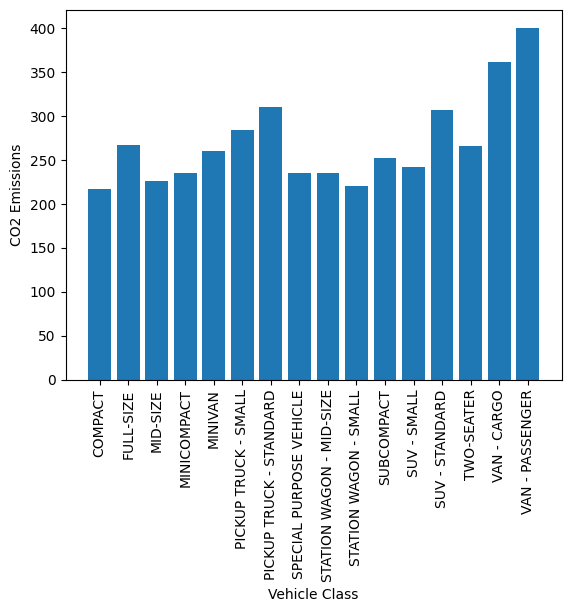

In [25]:
mean_per_vehicle_class = avg_emmisions_per_class["CO2EMISSIONS"]["mean"]

plt.xlabel("Vehicle Class")
plt.ylabel("CO2 Emissions")
plt.xticks(rotation=90)
plt.bar(avg_emmisions_per_class["VEHICLECLASS"],mean_per_vehicle_class)

>Inference:
The vehicle class `VAN PASSENGER` produces the most CO2 emission while `STATION WAGON` and `COMPACT` class of vehicles produce the least

## Now that we know which categories of vehicles and which companies contribute to the CO2 emissions the most, we must try to find if the other attributes i.e Engine Size and the number of cylinders present in each engine have any sort of relationship to the final CO2 emissions


### Drawing a scatter plot to check for a possible relationship

[2.0, 2.4, 1.5, 3.5, 3.7, 5.9, 4.7, 3.0, 4.0, 6.3, 4.2, 5.2, 6.0, 6.8, 4.4, 3.6, 1.4, 2.5, 6.2, 1.8, 4.3, 5.3, 4.8, 1.2, 5.7, 6.4, 4.6, 5.4, 1.6, 5.0, 1.0, 5.8, 3.8, 3.3, 5.6, 3.2, 6.5, 5.5, 2.1, 3.4, 2.7, 6.6, 6.7, 1.3, 8.4]


C:\Users\user\AppData\Local\Temp\ipykernel_18344\3384857087.py:7: FutureWarning: ['MAKE', 'MODEL', 'VEHICLECLASS'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  avg_emmisions_per_engine_size = group_engine_class.agg(func=["mean"]).reset_index()


,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
,,mean,mean,mean,mean,mean,mean
0,1.0,3.333333,7.100000,5.633333,6.466667,43.666667,148.666667
1,1.2,3.500000,7.175000,5.750000,6.550000,43.250000,150.750000
2,1.3,4.000000,6.600000,5.700000,6.200000,46.000000,143.000000
3,1.4,4.000000,8.789655,6.672414,7.837931,36.413793,180.241379
4,1.5,4.000000,7.758333,6.300000,7.091667,40.916667,163.083333


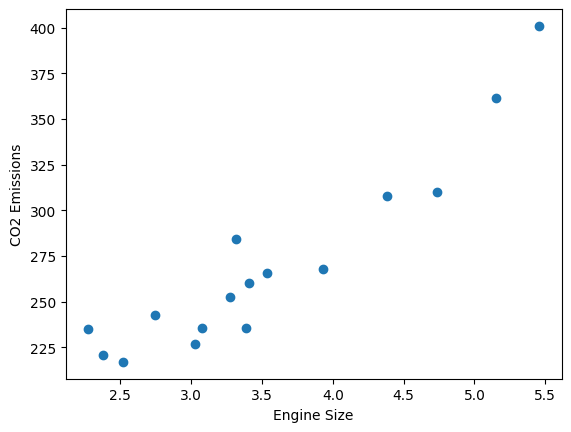

In [26]:
# Grouping by engine size and then by number of cylinders present

group_engine_class = fuelDf.groupby("ENGINESIZE",as_index=False) 
engine_classes = list(fuelDf["ENGINESIZE"].unique())
print(engine_classes)

avg_emmisions_per_engine_size = group_engine_class.agg(func=["mean"]).reset_index()
display(avg_emmisions_per_engine_size.head(5))

mean_per_engine_size = avg_emmisions_per_engine_size["CO2EMISSIONS"]["mean"]

plt.xlabel("Engine Size")
plt.ylabel("CO2 Emissions")
plt.scatter(avg_emmisions_per_class["ENGINESIZE"],mean_per_vehicle_class)

[4, 6, 12, 8, 10, 3, 5]


C:\Users\user\AppData\Local\Temp\ipykernel_18344\3309384090.py:7: FutureWarning: ['MAKE', 'MODEL', 'VEHICLECLASS'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  avg_emmisions_per_cylinder_cat = group_cylinder_class.agg(func=["mean"]).reset_index()


,CYLINDERS,ENGINESIZE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
,,mean,mean,mean,mean,mean,mean
0,3,1.100000,6.800000,5.600000,6.300000,44.750000,144.750000
1,4,1.978417,9.876978,7.339089,8.739808,33.088729,201.182254
2,5,2.500000,11.200000,7.966667,9.744444,29.000000,223.888889
3,6,3.459659,13.558523,9.562500,11.762216,24.619318,260.318182
4,8,5.233200,18.061600,12.620800,15.619200,18.648000,331.920000


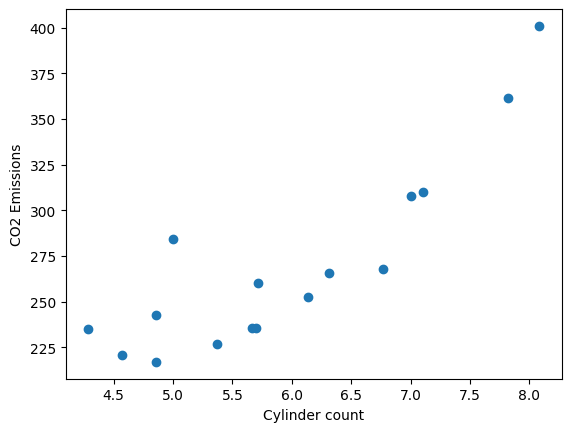

In [27]:
# cylinders 

group_cylinder_class = fuelDf.groupby("CYLINDERS",as_index=False) 
cylinder_classes = list(fuelDf["CYLINDERS"].unique())
print(cylinder_classes)

avg_emmisions_per_cylinder_cat = group_cylinder_class.agg(func=["mean"]).reset_index()
display(avg_emmisions_per_cylinder_cat.head(5))

mean_per_cylinder_cat = avg_emmisions_per_cylinder_cat["CO2EMISSIONS"]["mean"]

plt.xlabel("Cylinder count")
plt.ylabel("CO2 Emissions")
plt.scatter(avg_emmisions_per_class["CYLINDERS"],mean_per_vehicle_class)

>Inference:
Both cylinder and engine size shows a positive relationship with CO2 emissions i.e as the size of the engine and number of cylinders increase, so does the CO2 emissions produced by the machine increase.

In [28]:
# %%bash
# pip install tabulate

### Analyzing the numerical values

>Summarizing all the required stats for numerical attributes


In [29]:
from tabulate import tabulate
stats_ = fuelDf.describe().T.drop(["count"], axis=1)
stats_ = pd.concat([stats_, fuelDf.skew()], axis=1)
stats_.columns = ["mean", "std", "min", "25%", "median", "75%", "max", "skew"]
cols = ["mean", "25%", "median", "75%", "std", "skew", "min", "max"]
stats_ = stats_[cols]
print(tabulate(stats_, headers="keys", floatfmt=".2f"))

                            mean     25%    median     75%    std    skew     min     max
------------------------  ------  ------  --------  ------  -----  ------  ------  ------
ENGINESIZE                  3.35    2.00      3.40    4.30   1.42    0.57    1.00    8.40
CYLINDERS                   5.79    4.00      6.00    8.00   1.80    0.80    3.00   12.00
FUELCONSUMPTION_CITY       13.28   10.20     12.60   15.47   4.10    0.91    4.60   30.20
FUELCONSUMPTION_HWY         9.46    7.50      8.80   10.70   2.78    1.28    4.90   20.50
FUELCONSUMPTION_COMB       11.56    9.00     10.90   13.30   3.48    1.04    4.70   25.80
FUELCONSUMPTION_COMB_MPG   26.48   21.00     26.00   31.00   7.47    0.59   11.00   60.00
CO2EMISSIONS              256.17  207.00    251.00  294.00  63.42    0.53  108.00  488.00


C:\Users\user\AppData\Local\Temp\ipykernel_18344\3953188603.py:3: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  stats_ = pd.concat([stats_, fuelDf.skew()], axis=1)


### Conclusions from the table
 * The range of CO2 emission is from 108 to 488
 * mean CO2 emission is 256.23 and median is 251
 * 25% of the sample points has CO2 emissions within 207 and 75% has within 294.


##   To visualize the distribution of the dependent varibale using a Frequency 









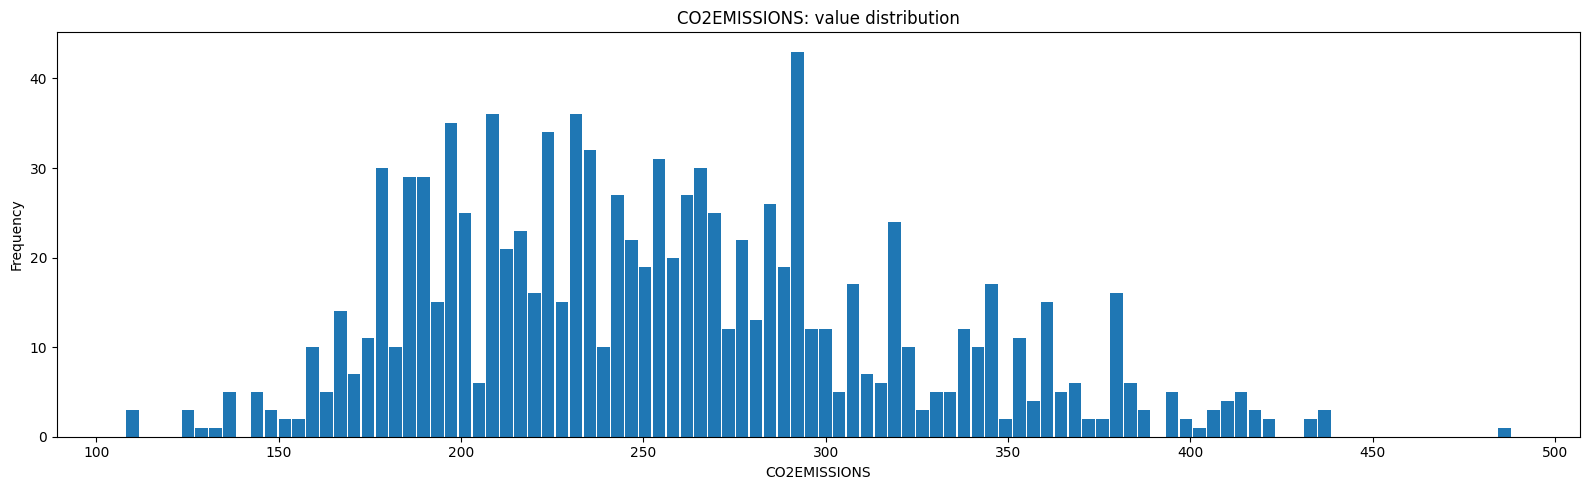

In [30]:
plt.figure(figsize=(16,5))
fuelDf["CO2EMISSIONS"].plot(kind="hist", bins=100, rwidth=0.9)
plt.title("CO2EMISSIONS: value distribution")
plt.xlabel("CO2EMISSIONS")
plt.tight_layout()
plt.show()


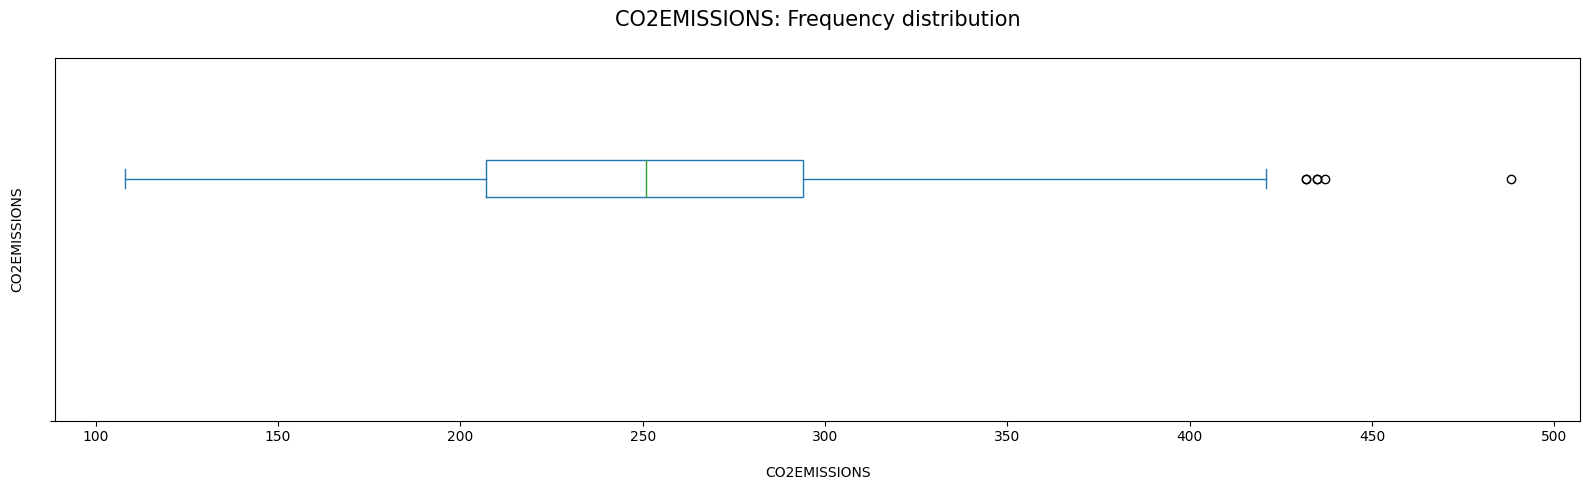

In [31]:
plt.figure(figsize=(16,5))
fuelDf["CO2EMISSIONS"].plot(kind="box", vert=False)
plt.title("CO2EMISSIONS: Frequency distribution\n", fontsize=15)
plt.xlabel("\nCO2EMISSIONS")
plt.yticks([0], [''])
plt.ylabel("CO2EMISSIONS\n", rotation=90)
plt.tight_layout()
plt.show()

>From boxplot we can infer that median of CO2 emissions is 251

## Correlation matrix

C:\Users\user\AppData\Local\Temp\ipykernel_18344\2316921982.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = fuelDf.corr()


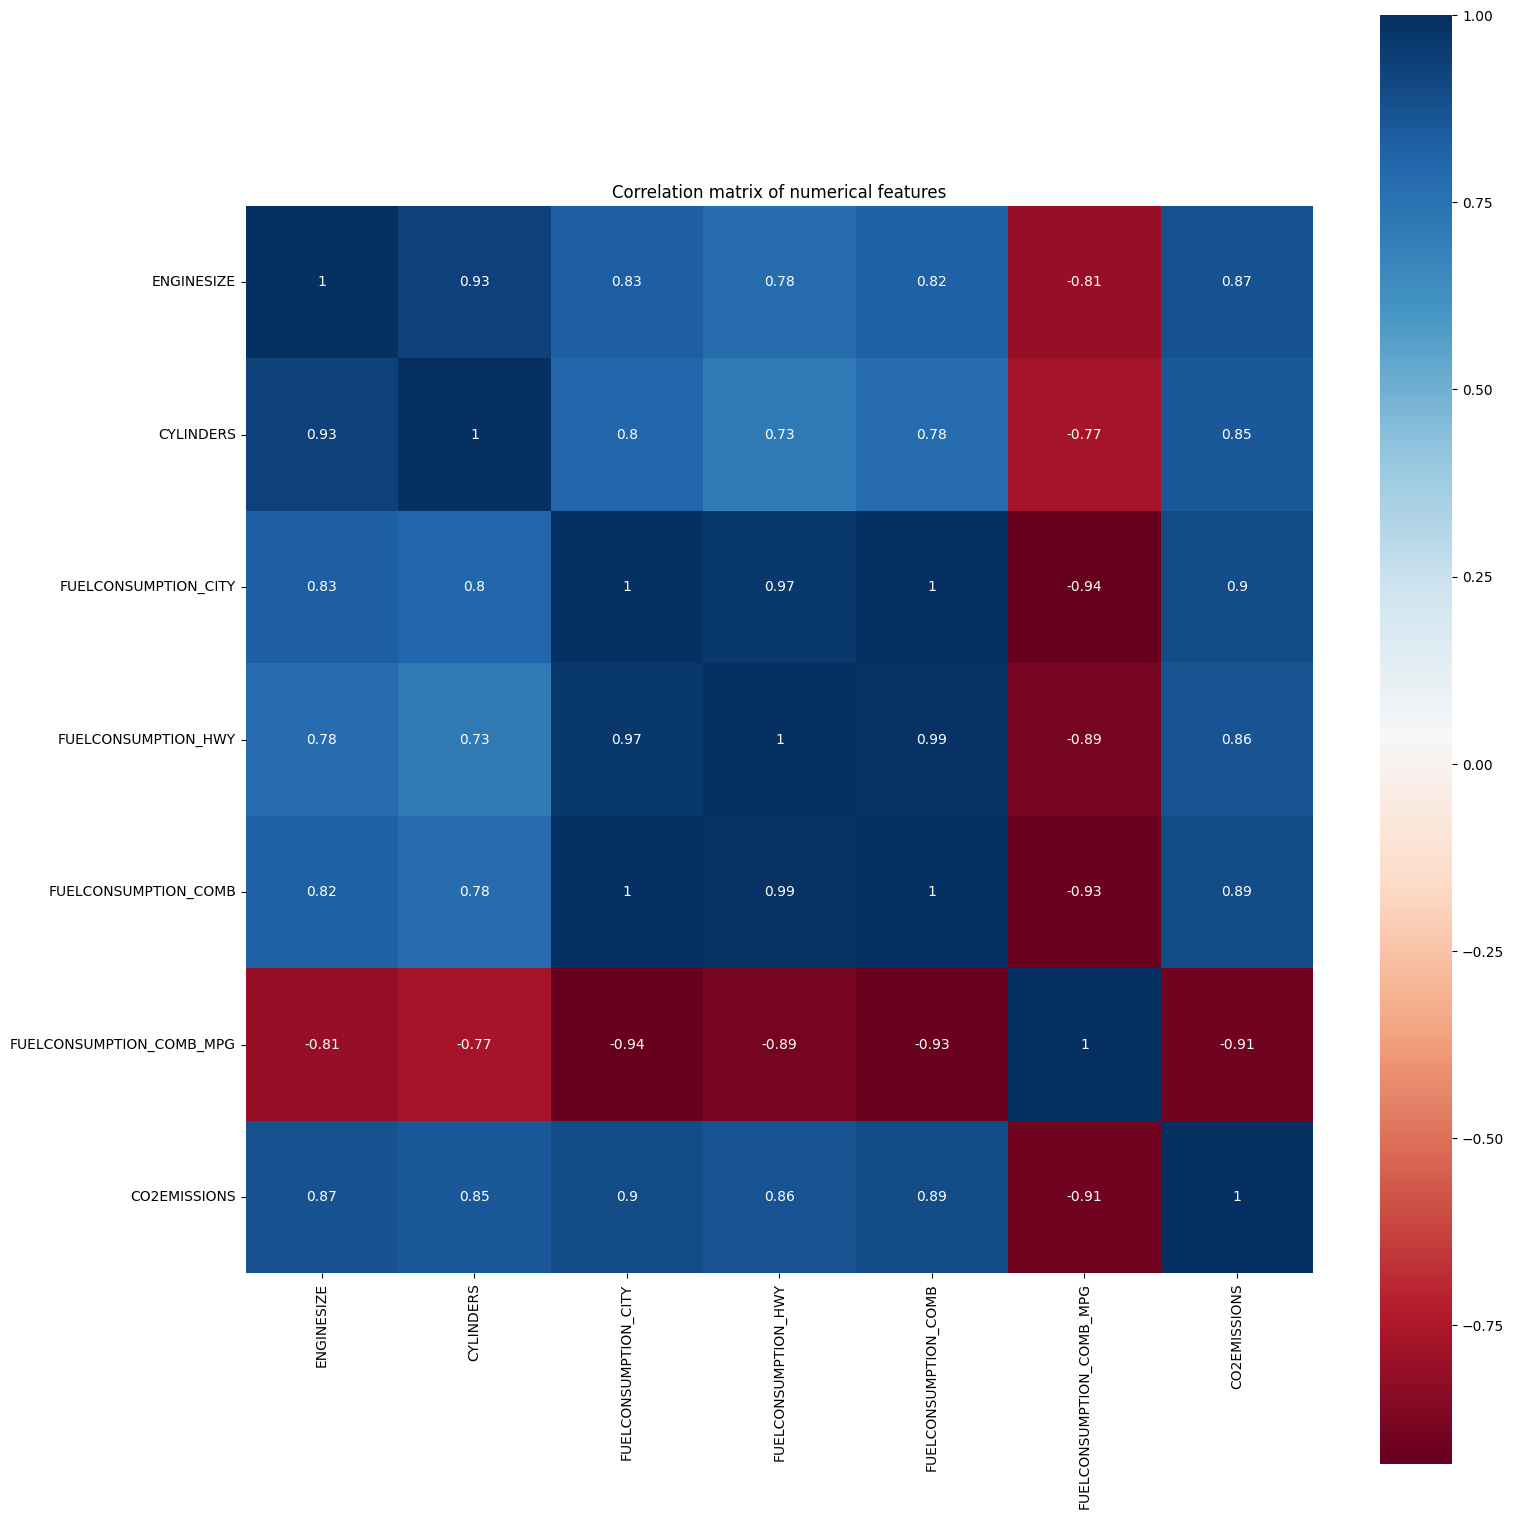

In [32]:
corr = fuelDf.corr()
plt.subplots(figsize=(16,16));
sns.heatmap(corr, annot=True, cmap="RdBu", square=True)
plt.title("Correlation matrix of numerical features")
plt.tight_layout()
plt.show()

> Fuel Consumption Comb (mpg) is negatively correlated to all the features.
All the other features are postively correlated with the CO2 emissions produced.

# Model Creation

In [33]:
fuelDf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1058 entries, 0 to 1066
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MAKE                      1058 non-null   object 
 1   MODEL                     1058 non-null   object 
 2   VEHICLECLASS              1058 non-null   object 
 3   ENGINESIZE                1058 non-null   float64
 4   CYLINDERS                 1058 non-null   int64  
 5   FUELCONSUMPTION_CITY      1058 non-null   float64
 6   FUELCONSUMPTION_HWY       1058 non-null   float64
 7   FUELCONSUMPTION_COMB      1058 non-null   float64
 8   FUELCONSUMPTION_COMB_MPG  1058 non-null   int64  
 9   CO2EMISSIONS              1058 non-null   int64  
dtypes: float64(4), int64(3), object(3)
memory usage: 90.9+ KB


## Splitted the data into training and testing samples inorder to do KNN algorithm

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
X = fuelDf[['ENGINESIZE','CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB','FUELCONSUMPTION_COMB_MPG']]
y = fuelDf['CO2EMISSIONS']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=11)

In [35]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)
knn_score = knn.score(X_test, y_test)

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
X = fuelDf[['ENGINESIZE','CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB','FUELCONSUMPTION_COMB_MPG']]
y = fuelDf['CO2EMISSIONS']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=11)

##splitted the data into training and testing samples inorder to do knn algorithm

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.4339622641509434

# Linear Regresion

### Splitting the dataset into training and testing datasets. Our target class is "CO2 Emissions" 

In [37]:
X = fuelDf.drop(["MAKE","MODEL","VEHICLECLASS","CO2EMISSIONS"],axis=1)
X_array = X.to_numpy()
y = fuelDf["CO2EMISSIONS"]
y_array = y.to_numpy()
print(X_array,y_array)

[[ 2.   4.   9.9  6.7  8.5 33. ]
 [ 2.4  4.  11.2  7.7  9.6 29. ]
 [ 1.5  4.   6.   5.8  5.9 48. ]
 ...
 [ 3.   6.  13.4  9.8 11.8 24. ]
 [ 3.2  6.  12.9  9.3 11.3 25. ]
 [ 3.2  6.  14.9 10.2 12.8 22. ]] [196 221 136 ... 271 260 294]


In [38]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X_array,y_array,random_state=42,shuffle=True,test_size=0.2)

In [39]:
# Now that we have split it into corresponding training and testing datasets, we can now fit our model with the training values

In [40]:
from sklearn.linear_model import LinearRegression, Ridge

model = LinearRegression().fit(X_train,y_train)

In [41]:
y_test

array([259, 317, 278, 260, 334, 202, 175, 340, 143, 184, 248, 242, 278,
       244, 221, 278, 292, 228, 205, 315, 340, 235, 366, 225, 294, 338,
       320, 271, 110, 244, 189, 159, 344, 267, 346, 274, 262, 267, 361,
       244, 292, 324, 191, 269, 258, 228, 290, 344, 269, 246, 237, 221,
       235, 272, 377, 334, 179, 235, 255, 301, 237, 255, 299, 280, 179,
       380, 212, 182, 304, 156, 297, 278, 246, 306, 239, 228, 419, 407,
       251, 267, 216, 193, 225, 265, 260, 320, 344, 294, 235, 179, 292,
       380, 297, 207, 294, 200, 161, 254, 366, 281, 207, 251, 191, 322,
       186, 216, 294, 393, 232, 264, 317, 202, 228, 255, 218, 209, 255,
       207, 294, 230, 170, 267, 258, 258, 274, 191, 179, 264, 290, 386,
       205, 207, 242, 340, 255, 232, 382, 209, 186, 255, 290, 285, 292,
       196, 202, 213, 166, 251, 285, 198, 258, 344, 237, 283, 179, 260,
       237, 285, 237, 306, 359, 258, 191, 207, 281, 225, 347, 258, 179,
       310, 324, 212, 191, 198, 173, 230, 278, 136, 297, 186, 30

In [42]:
y_pred_logistic = model.predict(X_test)

In [43]:
from sklearn import metrics
print("Mean Absolute Error: {0:.10f}".format(metrics.mean_absolute_error(y_pred_logistic,y_test)))
print("Mean Square Error: {0:.10f}".format(metrics.mean_squared_error(y_pred_logistic,y_test)))
linear_reg_rms = np.sqrt(metrics.mean_squared_error(y_pred_logistic,y_test))
print("Root Mean Squared Error: {0:.10f}".format(linear_reg_rms))

Mean Absolute Error: 14.4181536067
Mean Square Error: 466.4101774448
Root Mean Squared Error: 21.5965316068


In [44]:
model.score(X_train,y_train)

0.8948983002651563

In [45]:
y_test = y_test.reshape(-1,1)

In [46]:
linear_reg_score = model.score(X_test,y_test)
print(linear_reg_score)

0.8707820820051619


# Decision Trees
#### Preparing the Data

In [47]:
X = fuelDf.drop(['MAKE','MODEL','VEHICLECLASS','CO2EMISSIONS'], axis=1)
y = fuelDf['CO2EMISSIONS']

#### Execute the following code to divide our data into training and test sets:

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#### Training and Making Predictions

#### To train the tree, we'll instantiate the DecisionTreeRegressor class and call the fit method:

In [49]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

DecisionTreeRegressor()

#### To make predictions on the test set, use the predict method:

In [50]:
y_pred = regressor.predict(X_test)

#### Now let's compare some of our predicted values with the actual values and see how accurate we were:

In [51]:
df=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})

### Evaluating the Algorithm

In [52]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

decision_tree_rms = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
decision_tree_score = regressor.score(X_test,y_test)
print("SCore Decision Tree Training: ",regressor.score(X_train,y_train))
print("Score Decision Tree Testing: ",decision_tree_score)

Mean Absolute Error: 2.9245283018867925
Mean Squared Error: 170.49056603773585
Root Mean Squared Error: 13.057203607118021
SCore Decision Tree Training:  0.9998944818622675
Score Decision Tree Testing:  0.9535803217098218


> Conclusion: We showed how we can use Python's Scikit-Learn library to use decision trees for regression tasks. While being a fairly simple algorithm in itself, implementing decision trees with regression is even easier. 

# Random Forest Method

In [53]:
#Here the CO2EMissions and FuelConsumptioncomb is dropped because of the redundant features present in it.
X = fuelDf.drop(['CO2EMISSIONS','FUELCONSUMPTION_COMB'],axis=1)
y = fuelDf['CO2EMISSIONS']

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

#Here we split our dataset into training and testing datasets to make the  Random Forest Regressor Model

In [56]:
x_train.head()

,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB_MPG
663,LEXUS,IS 250 AWD,COMPACT,2.5,6,11.8,8.7,27
625,KIA,SOUL,STATION WAGON - SMALL,1.6,4,9.8,7.9,32
810,MINI,JOHN COOPER WORKS COUPE,TWO-SEATER,1.6,4,9.3,7.0,34
643,LAND ROVER,RANGE ROVER SPORT V6 3.0 SC,SUV - STANDARD,3.0,6,14.2,10.2,23
712,MAZDA,MAZDA3 5-DOOR (SIL),MID-SIZE,2.0,4,8.2,5.9,39


In [57]:
cat_cols = ['MAKE','MODEL','VEHICLECLASS']

#Encoding the remaining categorical Features with category_encoders.


In [58]:
import category_encoders as ce

In [59]:
target_enc = ce.CatBoostEncoder(cols = cat_cols)
target_enc.fit(x_train[cat_cols],y_train)


#Catboost is a target-based categorical encoder. 
# It is a supervised encoder that encodes categorical columns according to the target value.
#Here our target variable is CO2EMISSIONS.

CatBoostEncoder(cols=['MAKE', 'MODEL', 'VEHICLECLASS'])

In [60]:
train_enc = target_enc.transform(x_train[cat_cols])
test_enc = target_enc.transform(x_test[cat_cols])
train_enc.head()
#To produce a series with transformed values and that has the same axis length as self.

,MAKE,MODEL,VEHICLECLASS
663,241.752955,256.047281,219.693776
625,219.698402,219.261820,219.236685
810,190.930260,210.349094,266.441479
643,306.897225,256.047281,310.802717
712,190.093058,256.047281,227.475513


In [61]:
x_train = x_train.drop(['MAKE','MODEL','VEHICLECLASS'],axis=1)
x_test = x_test.drop(['MAKE','MODEL','VEHICLECLASS'],axis=1)

In [62]:
x_train = pd.concat([x_train,train_enc],axis=1)
x_test = pd.concat([x_test,test_enc],axis=1)

In [63]:
x_train.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB_MPG,MAKE,MODEL,VEHICLECLASS
663,2.5,6,11.8,8.7,27,241.752955,256.047281,219.693776
625,1.6,4,9.8,7.9,32,219.698402,219.261820,219.236685
810,1.6,4,9.3,7.0,34,190.930260,210.349094,266.441479
643,3.0,6,14.2,10.2,23,306.897225,256.047281,310.802717
712,2.0,4,8.2,5.9,39,190.093058,256.047281,227.475513


In [64]:
x_test.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB_MPG,MAKE,MODEL,VEHICLECLASS
465,3.6,6,18.8,13.1,17,322.028305,247.015760,239.402027
290,6.4,8,16.7,10.3,20,251.646234,256.047281,265.179810
324,3.6,6,13.9,9.8,23,250.380941,256.047281,310.802717
31,4.0,8,13.5,8.6,25,275.306869,256.047281,227.475513
436,5.3,8,23.5,17.7,14,322.028305,323.015760,358.649840


In [65]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
print(x_train)
xs_train = scaler.fit_transform(x_train)
xs_test = scaler.fit_transform(x_test)
print(xs_train)

      ENGINESIZE  CYLINDERS  FUELCONSUMPTION_CITY  FUELCONSUMPTION_HWY  \
663          2.5          6                  11.8                  8.7   
625          1.6          4                   9.8                  7.9   
810          1.6          4                   9.3                  7.0   
643          3.0          6                  14.2                 10.2   
712          2.0          4                   8.2                  5.9   
...          ...        ...                   ...                  ...   
331          3.6          6                  18.9                 12.9   
474          6.2          8                  23.3                 16.1   
121          4.4          8                  16.2                 10.9   
1053         2.0          4                  11.7                  9.4   
868          3.4          6                  12.4                  8.6   

      FUELCONSUMPTION_COMB_MPG        MAKE       MODEL  VEHICLECLASS  
663                         27  241.7529

In [66]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
rf = RandomForestRegressor(n_estimators=100)
model5 = rf.fit(x_train,y_train)
y_pred5 = model5.predict(x_test)
random_forest_score = r2_score(y_test,y_pred5)
print(random_forest_score)

0.979329184185679


#### Random Forest Regressor model performs exceptionally well than any other model so far with >95% accuracy 

In [67]:
from sklearn import metrics
print("Mean Absolute Error: {0:.10f}".format(metrics.mean_absolute_error(y_pred5,y_test)))
print("Mean Square Error: {0:.10f}".format(metrics.mean_squared_error(y_pred5,y_test)))
print("Root Mean Squared Error: {0:.10f}".format(np.sqrt(metrics.mean_squared_error(y_pred5,y_test))))

random_forest_rms = np.sqrt(metrics.mean_squared_error(y_pred5, y_test))

Mean Absolute Error: 4.1270283019
Mean Square Error: 74.6110061321
Root Mean Squared Error: 8.6377662698


### Graphing all the RMS values

[21.596531606830588, 13.057203607118021, 8.637766269822047]


<BarContainer object of 3 artists>

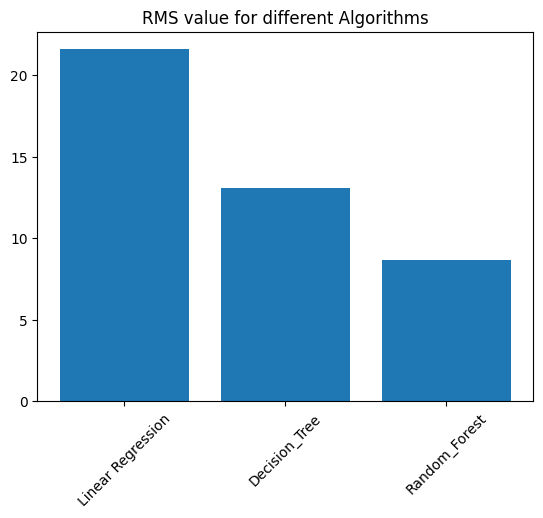

In [68]:
# Bar plot
data = {"Linear Regression": linear_reg_rms,"Decision_Tree":decision_tree_rms,"Random_Forest":random_forest_rms}
Model = list(data.keys())
values = list(data.values())
print(values)
plt.title("RMS value for different Algorithms")
plt.xticks(rotation=45)
plt.bar(Model,values)

<BarContainer object of 3 artists>

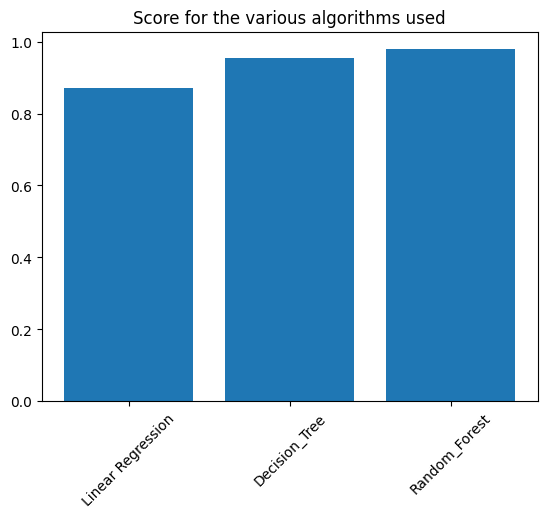

In [69]:
plt.title("Score for the various algorithms used")
data_score = {"Linear Regression": linear_reg_score,"Decision_Tree":decision_tree_score,"Random_Forest":random_forest_score}
Model_score = list(data_score.keys())
values_score = list(data_score.values())
plt.xticks(rotation=45)
plt.bar(Model_score,values_score)

> Inference: 
Based on the above graphs, the best models can be taken from Decision Tree and Random Forest. Since Random Forest is the culmulation of multiple decision trees, we can take the final model to be Random Forest as it does not seem to overfit the data and provides reasonably good score as well. 
The data from the graph is evidence enough for choosing Random_Forest as the desired model